# <center> Opening a new shopping mall in Singapore </center>

## 1. Introduction

### 1.1 Background

This capstone project is made specifically for IBM Data Science Professional Certificate, This project is based on a hypothetical scenario. I chose Singapore as the study object for this project. Singapore,famously known as the "the red dot" on the world map, is one of the most important financial and transport hubs in Asia. Due to its geographical advantages, Singapore welcomes tourists from all around the world. Each year, Singapore attracts a lot of foreign investment as a result of its location, skilled workforce, low tax rates, and advanced infrastructure. <br>

Singapore has a decent amount of shopping malls, because Singaporeans of all ages like to go to shopping malls for different purposes, some for shopping, some for dining out, some for watching movies... Not only the locals love going to shopping mall, but also the millions of tourists who visit Singapore each year. 

### 1.2 Business Problem

 Suppose a shopping mall chain is willing to open a new shopping mall outlet in Singapore to expand their business in South East Asia, however, the stakeholders are not familiar with Singapore.  They want to know which location would be the best to suit their needs.


### 1.3 Target Audience


1. The stakeholders who want to invest in the shopping mall. 
1. Tourists who visit Singapore. Singapore attracted approximately 19.1 million visitors in 2019 with receipts at S\\$27.1 billion, according to preliminary figures by the Singapore Tourism Board. The top three countries where the tourists are from are China, India and Indonesia.
1. Local Singaporean residents. As of June 2019, Singapore's population stood at 5.70 million.
    

## 2. Data

### 2.1 Data Requirments

- List of the planning areas of Singapore
- Coordination (Latitudes, Longitudes) of the planning areas in Singapore
- Top venues of each planning areas


### 2.2 Data Sources

- Downloaded the 2019 Singapore planning area dataset from:https://data.gov.sg/dataset/master-plan-2019-planning-area-boundary-no-sea?resource_id=06155d17-a1f2-44e8-926c-768bdba6e621, which contains columns including planning area, region, and latitude, longitude values.  

- Using foursquare API to retrieve venue data, we will focus especially on the category of shopping mall for the planning areas (neighborhoods). 


## 3. Methodology

We will use Pandas to pre-process, cleanse the dataset, build a dataframe of the planning areas of Singapore, visualize the neighborhoods on Folium, work with Foursquare API to obtain the venue data in each planning area (neighborhood), then explore and cluster the neighborhoods, we will be using KMeans clustering method to perform. Finally we will pick up the best cluster to recommend to the stakeholders for the best locations to open up a new shopping mall.

### Import libraries

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors
%matplotlib inline


### Import the CSV file 

In [2]:
path = "/home/sissi/singapore_planning_area.csv"
df = pd.read_csv(path)
df

,X,Y,gid,Name,description,PLN_AREA_N,PLN_AREA_C,CA_IND,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D
0,103.793357,1.328117,3,kml_3,NaN,BUKIT TIMAH,BT,N,CENTRAL REGION,CR,6CCDADD1F85173E9,20191206144714
1,103.801664,1.376076,4,kml_4,NaN,CENTRAL WATER CATCHMENT,CC,N,NORTH REGION,NR,9F30125764C74984,20191206144714
2,103.748492,1.387486,6,kml_6,NaN,CHOA CHU KANG,CK,N,WEST REGION,WR,5224CD5C7960361F,20191206144714
3,104.049107,1.387936,14,kml_14,NaN,NORTH-EASTERN ISLANDS,NE,N,NORTH-EAST REGION,NER,E75708EADCFF04A6,20191206144714
4,103.725202,1.362108,34,kml_34,NaN,TENGAH,TH,N,WEST REGION,WR,0D2FF9150EC36DFE,20191206144714
5,103.913796,1.406764,18,kml_18,NaN,PUNGGOL,PG,N,NORTH-EAST REGION,NER,51833C3BEA49A0E9,20191206144714
6,103.698202,1.312923,22,kml_22,NaN,BOON LAY,BL,N,WEST REGION,WR,D67ECAA47DF4B485,20191206144714
7,103.892283,1.256292,38,kml_38,NaN,MARINA EAST,ME,Y,CENTRAL REGION,CR,1B9566319261C802,20191206144714
8,103.667422,1.306725,17,kml_17,NaN,PIONEER,PN,N,WEST REGION,WR,3202B87B465BF3BD,20191206144714
9,103.818933,1.457080,26,kml_26,NaN,SEMBAWANG,SB,N,NORTH REGION,NR,4794FB10E1985217,20191206144714


### Cleanse the data

In [3]:
sg_df = df.loc[:, ["X", "Y", "PLN_AREA_N","REGION_N"]]

sg_df.rename(columns ={"X":"Longitude", "Y":"Latitude", "PLN_AREA_N":"Neighborhood", "REGION_N":"Region"}, inplace=True)
sg_df['Neighborhood'] = sg_df['Neighborhood'].str.title()
sg_df['Region'] = sg_df['Region'].str.title()



sg_df

,Longitude,Latitude,Neighborhood,Region
0,103.793357,1.328117,Bukit Timah,Central Region
1,103.801664,1.376076,Central Water Catchment,North Region
2,103.748492,1.387486,Choa Chu Kang,West Region
3,104.049107,1.387936,North-Eastern Islands,North-East Region
4,103.725202,1.362108,Tengah,West Region
5,103.913796,1.406764,Punggol,North-East Region
6,103.698202,1.312923,Boon Lay,West Region
7,103.892283,1.256292,Marina East,Central Region
8,103.667422,1.306725,Pioneer,West Region
9,103.818933,1.457080,Sembawang,North Region


###  Create Singapore map using Folium

In [4]:
# get the coords of Singapore
from geopy.geocoders import Nominatim
address = "Singapore"

geolocator = Nominatim(user_agent="singapore_map")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Singapore {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Singapore 1.3408630000000001, 103.83039182212079.


In [5]:
import folium
sg_map = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, neighborhood in zip(sg_df["Latitude"], sg_df['Longitude'], sg_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(sg_map)  
    
sg_map


###  Use the Foursquare API to explore the neighborhoods

In [6]:
CLIENT_ID = 'your Foursquare ID' # your Foursquare ID
CLIENT_SECRET = 'your Foursquare Secret' # your Foursquare Secret
VERSION = '20200811' # Foursquare API version
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MJQP45R4SJKHU0WEPOAGYVGMFA0LHN2E4PIEIAIVRVOYTSY5
CLIENT_SECRET:WJJ3H4413NZ4LM00LYUK32L24VV354GOERGQIFO3INCV0JB0


#### Get the top 100 venues within the radius of 1500 meters.

In [7]:
LIMIT = 100
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)


In [8]:
sg_venues = getNearbyVenues(names = sg_df["Neighborhood"],
                            latitudes = sg_df["Latitude"],
                            longitudes = sg_df["Longitude"])
sg_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bukit Timah,1.328117,103.793357,Plank Sourdough Pizza By Baker & Cook,1.323890,103.796797,Pizza Place
1,Bukit Timah,1.328117,103.793357,Brazil Churrasco,1.330798,103.795201,Churrascaria
2,Bukit Timah,1.328117,103.793357,MEAT n' CHILL,1.331425,103.794955,BBQ Joint
3,Bukit Timah,1.328117,103.793357,Simply Bread,1.330535,103.795658,Bakery
4,Bukit Timah,1.328117,103.793357,Sunny Heights,1.334700,103.794795,Dog Run


#### Check the count of venues for each neighborhood

In [9]:
sg_venues.groupby(['Neighborhood']).count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Ang Mo Kio,100,100,100,100,100,100
Bedok,20,20,20,20,20,20
Bishan,100,100,100,100,100,100
Boon Lay,26,26,26,26,26,26
Bukit Batok,83,83,83,83,83,83
Bukit Merah,100,100,100,100,100,100
Bukit Panjang,62,62,62,62,62,62
Bukit Timah,89,89,89,89,89,89
Central Water Catchment,5,5,5,5,5,5


In [10]:
print("There are {} unique categories".format(len(sg_venues["Venue Category"].unique())))

There are 307 unique categories


In [11]:
print(sg_venues['Venue Category'].value_counts())

Coffee Shop                154
Chinese Restaurant         146
Food Court                 145
Café                       107
Japanese Restaurant         96
                          ... 
Business Service             1
Rock Climbing Spot           1
Hockey Arena                 1
Outdoor Sculpture            1
Health & Beauty Service      1
Name: Venue Category, Length: 307, dtype: int64


#### Create a Data-frame with the 20 Most Frequently Occuring Venue Category


In [12]:
# create a dataframe of top 10 categories
sg_top20 = sg_venues['Venue Category'].value_counts()[0:20].to_frame(name='frequency')
sg_top20 = sg_top20.reset_index()


sg_top20.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)
sg_top20

,Venue Category,Frequency
0,Coffee Shop,154
1,Chinese Restaurant,146
2,Food Court,145
3,Café,107
4,Japanese Restaurant,96
5,Hotel,93
6,Asian Restaurant,78
7,Fast Food Restaurant,75
8,Supermarket,66
9,Bakery,63


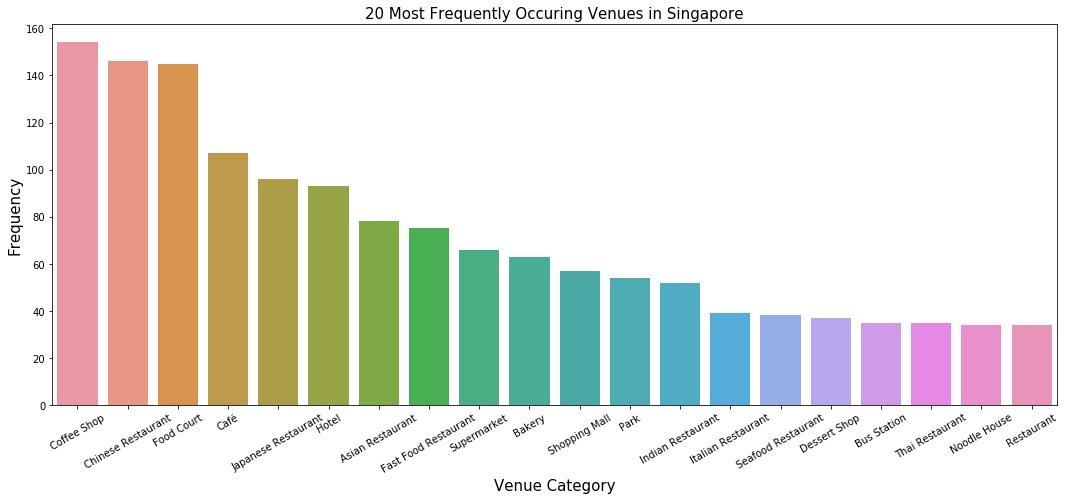

In [13]:
import seaborn as sns
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue Category", y="Frequency", data=sg_top20)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('20 Most Frequently Occuring Venues in Singapore', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("sg_top20", dpi=300)
plt.show()

###  Analyze Each Neighborhood

#### Add one hot encoding

In [14]:
sg_onehot = pd.get_dummies(sg_venues[['Venue Category']], prefix="", prefix_sep ="")

sg_onehot["Neighborhood"] = sg_venues['Neighborhood']

fixed_columns = [sg_onehot.columns[-1]] + list(sg_onehot.columns[:-1])
sg_onehot = sg_onehot[fixed_columns]

sg_onehot.head()

,Neighborhood,Airport,Airport Service,Airport Terminal,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Warehouse Store,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio,Zoo,Zoo Exhibit
0,Bukit Timah,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bukit Timah,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bukit Timah,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bukit Timah,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bukit Timah,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Group by neighborhoods

In [15]:
sg_grouped = sg_onehot.groupby(["Neighborhood"]).mean().reset_index()

print(sg_grouped.shape)
sg_grouped

(55, 308)


,Neighborhood,Airport,Airport Service,Airport Terminal,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Warehouse Store,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio,Zoo,Zoo Exhibit
0,Ang Mo Kio,0.000000,0.0,0.000000,0.010000,0.00,0.00,0.00,0.000000,0.030000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000
1,Bedok,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.100000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.100000,0.00,0.000000,0.000000
2,Bishan,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000
3,Boon Lay,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,...,0.000000,0.038462,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.038462,0.076923
4,Bukit Batok,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000
5,Bukit Merah,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.030000,...,0.000000,0.000000,0.010000,0.00,0.010000,0.00,0.000000,0.02,0.000000,0.000000
6,Bukit Panjang,0.000000,0.0,0.000000,0.032258,0.00,0.00,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000
7,Bukit Timah,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.011236,...,0.000000,0.000000,0.000000,0.00,0.022472,0.00,0.000000,0.00,0.000000,0.000000
8,Central Water Catchment,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000
9,Changi,0.000000,0.5,0.500000,0.000000,0.00,0.00,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000


#### New dataframe for all the existing shopping malls in Singapore

In [16]:
mall_sg = sg_grouped[['Neighborhood', 'Shopping Mall']]
mall_sg.head()

,Neighborhood,Shopping Mall
0,Ang Mo Kio,0.010000
1,Bedok,0.000000
2,Bishan,0.010000
3,Boon Lay,0.038462
4,Bukit Batok,0.036145


### Using K-Means clustering to cluster the neighborhoods

In [17]:
#import library
from sklearn.cluster import KMeans

#### Set into 4 clusters
kclusters = 4

sg_clustering = mall_sg.drop(["Neighborhood"], 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sg_clustering)

kmeans.labels_[0:10]

array([2, 0, 2, 1, 1, 2, 1, 2, 0, 0], dtype=int32)

#### Create a new DataFrame that inlcudes the cluster and the top 10 malls for each neighborhood

In [18]:
sg_merged = mall_sg.copy()

sg_merged["Cluster Labels"] = kmeans.labels_

In [19]:
sg_merged.head()


,Neighborhood,Shopping Mall,Cluster Labels
0,Ang Mo Kio,0.010000,2
1,Bedok,0.000000,0
2,Bishan,0.010000,2
3,Boon Lay,0.038462,1
4,Bukit Batok,0.036145,1


#### merge sg_grouped with sg_df to add latitude/longitude for each neighborhood

In [20]:
sg_merged = sg_merged.join(sg_df.set_index("Neighborhood"), on="Neighborhood")


#### Sort the result by Cluster Labels

In [21]:
sg_merged.sort_values(["Cluster Labels"], inplace=True)
sg_merged

,Neighborhood,Shopping Mall,Cluster Labels,Longitude,Latitude,Region
18,Kallang,0.000000,0,103.865107,1.312327,Central Region
32,Pioneer,0.000000,0,103.667422,1.306725,West Region
31,Paya Lebar,0.000000,0,103.917381,1.360554,East Region
41,Simpang,0.000000,0,103.857281,1.444517,North Region
29,Outram,0.000000,0,103.843701,1.281626,Central Region
43,Southern Islands,0.000000,0,103.826155,1.229460,Central Region
26,North-Eastern Islands,0.000000,0,104.049107,1.387936,North-East Region
44,Straits View,0.000000,0,103.868795,1.246133,Central Region
45,Sungei Kadut,0.000000,0,103.755742,1.419650,North Region
23,Marine Parade,0.000000,0,103.913258,1.268724,Central Region


#### Visualize the resulting clusters

In [27]:
# create map
map_clusters = folium.Map(location = [latitude, longitude], zoom_start = 11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i * x) ** 2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(sg_merged['Latitude'], sg_merged['Longitude'], sg_merged['Neighborhood'], sg_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius = 5,
        popup = label,
        color = rainbow[cluster - 1],
        fill = True,
        fill_color = rainbow[cluster - 1],
        fill_opacity = 0.7).add_to(map_clusters)
    
map_clusters

### Examine the clusters

### First Cluster  (Cluster Labels=0)

In [23]:
sg_merged.loc[sg_merged['Cluster Labels'] == 0]

,Neighborhood,Shopping Mall,Cluster Labels,Longitude,Latitude,Region
18,Kallang,0.0,0,103.865107,1.312327,Central Region
32,Pioneer,0.0,0,103.667422,1.306725,West Region
31,Paya Lebar,0.0,0,103.917381,1.360554,East Region
41,Simpang,0.0,0,103.857281,1.444517,North Region
29,Outram,0.0,0,103.843701,1.281626,Central Region
43,Southern Islands,0.0,0,103.826155,1.229460,Central Region
26,North-Eastern Islands,0.0,0,104.049107,1.387936,North-East Region
44,Straits View,0.0,0,103.868795,1.246133,Central Region
45,Sungei Kadut,0.0,0,103.755742,1.419650,North Region
23,Marine Parade,0.0,0,103.913258,1.268724,Central Region


### Second Cluster  (Cluster Labels=1)

In [24]:
sg_merged.loc[sg_merged['Cluster Labels'] == 1]

,Neighborhood,Shopping Mall,Cluster Labels,Longitude,Latitude,Region
39,Sengkang,0.029851,1,103.895550,1.388638,North-East Region
34,Queenstown,0.043478,1,103.773753,1.276400,Central Region
3,Boon Lay,0.038462,1,103.698202,1.312923,West Region
6,Bukit Panjang,0.032258,1,103.773045,1.366217,West Region
17,Jurong West,0.030928,1,103.704815,1.343955,West Region
4,Bukit Batok,0.036145,1,103.752601,1.356029,West Region
54,Yishun,0.030000,1,103.843395,1.419031,North Region


### Third Cluster  (Cluster Labels=2)

In [25]:
sg_merged.loc[sg_merged['Cluster Labels'] == 2]

,Neighborhood,Shopping Mall,Cluster Labels,Longitude,Latitude,Region
42,Singapore River,0.020000,2,103.840498,1.290871,Central Region
46,Tampines,0.010417,2,103.968145,1.324290,East Region
40,Serangoon,0.010000,2,103.867606,1.366010,North-East Region
38,Sembawang,0.023256,2,103.818933,1.457080,North Region
0,Ang Mo Kio,0.010000,2,103.842565,1.376729,North-East Region
33,Punggol,0.012346,2,103.913796,1.406764,North-East Region
30,Pasir Ris,0.018868,2,103.949546,1.379571,East Region
24,Museum,0.020000,2,103.847505,1.295972,Central Region
15,Hougang,0.010000,2,103.888800,1.360946,North-East Region
14,Geylang,0.010000,2,103.889852,1.321163,Central Region


### Fourth Cluster  (Cluster Labels=3)

In [26]:
sg_merged.loc[sg_merged['Cluster Labels'] == 3]

,Neighborhood,Shopping Mall,Cluster Labels,Longitude,Latitude,Region
35,River Valley,0.07,3,103.836371,1.297884,Central Region
28,Orchard,0.06,3,103.834065,1.304012,Central Region
53,Woodlands,0.05,3,103.787925,1.443618,North Region
25,Newton,0.05,3,103.840985,1.308506,Central Region


## 4. Result and Discussion

As showed on the top 20 most common venue categories bar chart, we can find out that there are currently 55 shopping malls in Singapore and it's ranked the 11th most popular venue category. 

By observing the above clustering data, we could find the following analysis.

- First cluster (Cluster label 0, red dots) has no shopping malls, as we can see, the neighborhoods are mostly in suburb areas and distant islands. 

- Second cluster (Cluster label 1) has an above-average number of shopping malls, mostly in West Region.  

- Third cluster (Cluster label 2) shows a limited amount of shopping malls, located mostly in Central Region. 

- Fourth cluster (Cluster label 3) has the highest amount of shopping malls. It's easy to identify most places are in central region. For example, Orchard is a well-known shopping center in Singapore. While Woodlands, even in North Region, but it's the regional center of the North Region and being located immediately across from Johor Bahru, Malaysia, Woodlands is highly accessible, connected as the border between two countries, which brings a certain amount of business including shopping malls.



### Recommendations

I would strongly recommend the stakeholders invest in the second cluster. The third cluster could be considered too. Reasons are as follows:<br>
1. As we can see in the fourth cluster, there has been already a relatively high amount of shopping malls existed, which will be really competitive. 
1. However, investing in the first cluster could be relatively risky, since most locations are in suburb area, which are less populated and are of industrial zones instead of residential areas. 
1. In the second cluster, most neighborhoods are well-located in the central and west region, and currently there are a moderate amount of shopping malls, but not too competitive as the fourth cluster, which creates great potential for shopping mall investments.
1. Also, the neighborhoods in the third cluster has limited amount of shopping malls, which could be our plan B - second recommendation.



## 5. Conclusion

In this study, I aimed to find out the best location to open a new shopping mall for investors. However, this study has a few limits due to lack of other datasets such as population density in each planning area, household annual income and rental prices in each planning area, which may affect the local residents' purchasing power. Also, whether there are any hotels nearby would also be a contributing factor in deciding which location would be the best fit for opening a new shopping mall. There is more room to explore and the accuracy of the models has more room to improve as well. 